# India - Language Diversity Data

<p style="font-size:18px">This notebook will describe the data I have used for my project.</p>

## Dataset

<p style="font-size:16px">As specified in the problem description I intend to perform clustering based on the languages spoken in each state of India and analyze its results. For this I require reliable data which depicts the languages spoken in India for every state and Union Territory in detail.</p>

<p style="font-size:16px">After some research I was able to find what I needed on Wikipedia. Here's a link to the wikipedia page: <a>https://en.wikipedia.org/wiki/Indian_States_by_most_popular_languages</a></p>

<p style="font-size:16px">Let us proceed to import the table and have a quick look at the dataset to see what we're dealing with.</p>

In [2]:
import pandas as pd
df = pd.read_html('https://en.wikipedia.org/wiki/Indian_States_by_most_popular_languages')[0]
df.head(10)

,State / Union Territory,Language 1,Language 2,Language 3,Language 4,Language 5
0,Andaman & Nicobar Islands,Bengali,Hindi,Tamil,Telugu,Malayalam
1,Andhra Pradesh,Telugu,Urdu,Hindi,Tamil,Marathi
2,Arunachal Pradesh,Nishi,Adi,Bengali,Nepali,Hindi
3,Assam,Assamese,Hindi,Bodo,Nepali,NaN
4,Bihar,Hindi (Bhojpuri and Magahi),Maithili,Urdu,Bengali,Santali
5,Chandigarh,Hindi,Punjabi,Urdu,Nepali,Bengali
6,Chhattisgarh,Hindi (Chhattisgarhi),Odia,Bengali,Telugu,Marathi
7,Dadra & Nagar Haveli,Hindi,Gujarati,Marathi,Konkani,Odia
8,Daman & Diu,Gujarati,Hindi,Marathi,Bengali,Odia
9,Delhi,Hindi,Punjabi,Urdu,Bengali,Maithili


<p style="font-size:16px">The table has 6 columns with the first column containing the name of the state or the union territory and the next 5 columns basically tell us which languages are spoken in that particular state. However, in the 'Language 1' column we do notice dialects of Hindi specified as well and that is some information that would not be relevant to the project here. Therefore we will have to perform some data cleaning for that particular column and replace it with only Hindi </p>

<p style="font-size:16px"> We also notice some null values for the column 'Language 5'. Since our data consists of categorical data we cannot replace the NaN values with the mean of the values in that particular column. Therefore, it is safe to replace the absent data with 'English' and it is after all a common language most people of India know and speak, perhaps after Hindi.</p>

In [11]:
import string
first_lang=[]
for word in df['Language 1']:
    word_list=[i.strip(string.punctuation) for i in word.split()]
    first_lang.append(word_list[0])
print(first_lang)  

['Bengali', 'Telugu', 'Nishi', 'Assamese', 'Hindi', 'Hindi', 'Hindi', 'Hindi', 'Gujarati', 'Hindi', 'Konkani', 'Gujarati', 'Hindi', 'Hindi', 'Kashmiri', 'Hindi', 'Kannada', 'Malayalam', 'Malayalam', 'Hindi', 'Marathi', 'Manipuri', 'Khasi', 'Mizo', 'Naga', 'Odia', 'Tamil', 'Punjabi', 'Hindi', 'Nepali', 'Tamil', 'Telugu', 'Bengali', 'Hindi', 'Hindi', 'Bengali']


In [5]:
df['Language 1']=first_lang
df['Language 5'].fillna("English", inplace = True)
df = df.rename(columns={'State / Union Territory': 'State_UT'})
df.head(10)

,State_UT,Language 1,Language 2,Language 3,Language 4,Language 5
0,Andaman & Nicobar Islands,Bengali,Hindi,Tamil,Telugu,Malayalam
1,Andhra Pradesh,Telugu,Urdu,Hindi,Tamil,Marathi
2,Arunachal Pradesh,Nishi,Adi,Bengali,Nepali,Hindi
3,Assam,Assamese,Hindi,Bodo,Nepali,English
4,Bihar,Hindi,Maithili,Urdu,Bengali,Santali
5,Chandigarh,Hindi,Punjabi,Urdu,Nepali,Bengali
6,Chhattisgarh,Hindi,Odia,Bengali,Telugu,Marathi
7,Dadra & Nagar Haveli,Hindi,Gujarati,Marathi,Konkani,Odia
8,Daman & Diu,Gujarati,Hindi,Marathi,Bengali,Odia
9,Delhi,Hindi,Punjabi,Urdu,Bengali,Maithili


<p style="font-size:16px">Now that our data has been cleaned we can go on to visualize it.</p>

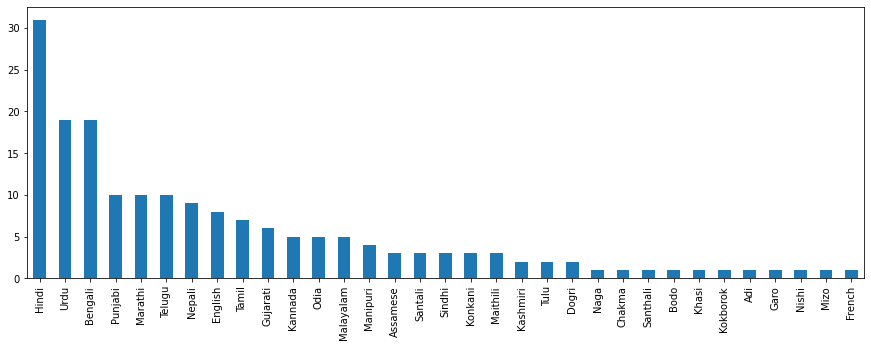

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

state_list=list()
for i in df['State_UT']:
    state_list.append(i)
state_list*=5
len(state_list)


mod_df=pd.DataFrame(columns=['State_UT', 'Languages'])
mod_df['State_UT']=state_list
frames = [df['Language 1'], df['Language 2'],df['Language 3'],df['Language 4'],df['Language 5']]
result=pd.concat(frames)
lang_list=list(result)
lang_list
mod_df['Languages']=lang_list


plt.figure(figsize=(15,5))
mod_df['Languages'].value_counts().plot(kind='bar')

<p style="font-size:16px">We can clearly see that Hindi is the most widely spoken language followed by Urdu and Bengali. We will now use this data for clustering and further analysis for our project. </p>